In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dataset Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSCE464/Datasets/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [ ]:
df['Iris-setosa'] = df['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 0)
df['Iris-versicolor'] = df['Species'].apply(lambda x: 1 if x=='Iris-versicolor' else 0)
df['Iris-virginica'] = df['Species'].apply(lambda x: 1 if x=='Iris-virginica' else 0)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [ ]:
df = df.drop(['Id', 'Species'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
x_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_data = df[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Softmax Model in TensorFlow

In [ ]:
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])
W = tf.Variable(tf.random_normal([4, 3], name="weights"))
b = tf.Variable(tf.random_normal([1], name="bias"))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_pred = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(1001):
  sess.run(optimizer, feed_dict={X: x_train, Y:y_train})

  if epoch % 100 == 0:
    _, acc = sess.run([cost, accuracy], feed_dict={X: x_test, Y: y_test})
    print("Epoch: {:5}\t Cost: {:.3f}\t Accuracy: {:.2%}".format(epoch, _, acc))

Epoch:     0	 Cost: 1.494	 Accuracy: 53.33%
Epoch:   100	 Cost: 0.379	 Accuracy: 80.00%
Epoch:   200	 Cost: 0.350	 Accuracy: 80.00%
Epoch:   300	 Cost: 0.339	 Accuracy: 83.33%
Epoch:   400	 Cost: 0.332	 Accuracy: 83.33%
Epoch:   500	 Cost: 0.327	 Accuracy: 83.33%
Epoch:   600	 Cost: 0.323	 Accuracy: 83.33%
Epoch:   700	 Cost: 0.319	 Accuracy: 83.33%
Epoch:   800	 Cost: 0.317	 Accuracy: 83.33%
Epoch:   900	 Cost: 0.314	 Accuracy: 83.33%
Epoch:  1000	 Cost: 0.312	 Accuracy: 83.33%


# Softmax Model in PyTorch

In [ ]:
x_train, x_test = torch.FloatTensor(x_train), torch.FloatTensor(x_test)
y_train, y_test = torch.FloatTensor(y_train.to_numpy()), torch.FloatTensor(y_test.to_numpy())

In [ ]:
class SoftmaxClassfier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)
    self.softmax = nn.Softmax()
  def forward(self, x):
    return self.softmax(self.linear(x))

In [ ]:
model = SoftmaxClassfier()

====Summary of Model Training====
Epoch:    0 / 1000 Cost: 0.945 Training Accuracy 75.00%
Epoch:  100 / 1000 Cost: 0.764 Training Accuracy 85.83%
Epoch:  200 / 1000 Cost: 0.732 Training Accuracy 87.50%


<ipython-input-115-bb0b3640a76b>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.linear(x))


Epoch:  300 / 1000 Cost: 0.714 Training Accuracy 89.17%
Epoch:  400 / 1000 Cost: 0.700 Training Accuracy 91.67%
Epoch:  500 / 1000 Cost: 0.688 Training Accuracy 91.67%
Epoch:  600 / 1000 Cost: 0.678 Training Accuracy 92.50%
Epoch:  700 / 1000 Cost: 0.669 Training Accuracy 92.50%
Epoch:  800 / 1000 Cost: 0.661 Training Accuracy 93.33%
Epoch:  900 / 1000 Cost: 0.655 Training Accuracy 94.17%
Epoch: 1000 / 1000 Cost: 0.649 Training Accuracy 95.00%


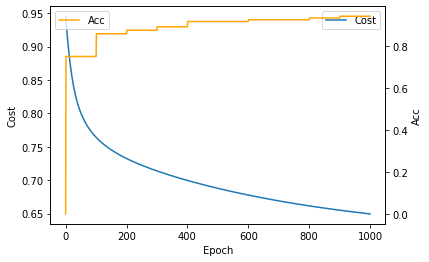

In [ ]:
x_axis = []
y1_axis = []
y2_axis = []
accuracy = 0

optimizer = optim.SGD(model.parameters(), lr=0.1)

print("====Summary of Model Training====")

for epoch in range(1001):
  x = x_train
  y = y_train

  hypothesis = model(x)

  cost = F.cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y1_axis.append(cost.item())
  y2_axis.append(accuracy)

  if epoch % 100 == 0:
    prediction = hypothesis
    correct_pred = torch.argmax(prediction, 1) == torch.argmax(y, 1)
    accuracy = correct_pred.float().mean()

    print("Epoch: {:4d} / {} Cost: {:.3f} Training Accuracy {:.2f}%".
          format(epoch, 1000, cost.item(), accuracy * 100))

fig, x1 = plt.subplots()
x1.set_xlabel('Epoch')
x1.set_ylabel('Cost')
x1.plot(x_axis, y1_axis, label = 'Cost')
x1.legend(loc='upper right')

x2 = x1.twinx()
x2.set_ylabel("Acc")
x2.plot(x_axis, y2_axis, label="Acc", color="Orange")
x2.legend(loc="upper left")
plt.show()

In [ ]:
with torch.no_grad():
  x = x_test
  y = y_test

  prediction = model(x)
  correct_pred = torch.argmax(prediction, 1) == torch.argmax(y, 1)
  accuracy = correct_pred.float().mean()
  print("Testing Accuracy {:.2f}%".format(accuracy*100))

Testing Accuracy 96.67%


<ipython-input-115-bb0b3640a76b>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.linear(x))
